## Social Research Text Analysis in R Seminar Presentation: Mapping Term Correlations in Brexit Tweets

<p>Looking at term correlations serves as a useful way to initially explore textual data, in order to get a feel for the topics and focuses of a certain discourse. For this presentation, I am looking at a database of Tweets using the #Brexit hashtag from the week the UK left the EU. We demonstrate how the 'tidytext' and 'tm' packages, along with the 'igraph' and 'ggraph' packages can be used to present a map of term correlations. This map is a useful starting point for further analysis.</p>

**The plot takes a while to display in the Notebook. The pdf file can be dowloaded using by saving <a href = "./mapped_correlations.pdf" >this link.</a>**

In [2]:
library(ggplot2)
library(tidyr)
library(tidytext)
library(tm)
library(dplyr)
library(widyr)
require(igraph)
require(ggraph)
require(repr)

load("brexit_tweets.Rda")
tweets$tweet_num<- seq(1:nrow(tweets))

tdf<- unnest_tokens(tweets, word, text)
elim<- data.frame(word = c("t.co", "https", "ðÿ", "â", "amp", "iâ", "ó", "ï", "ðÿz", "itâ", "ºðÿ", "donâ", "à", "ªðÿ", "º"))
tdf<- anti_join(tdf, stop_words)
tdf<- anti_join(tdf, elim)
print("Done!")

Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following object is masked from 'package:tidyr':

    crossing


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Loading required package: ggraph

Loading required package: repr

Joining, by = "word"

Joining, by = "word"

Warning message:
"Column `word` joining character vector and factor, coercing into character vector"


[1] "Done!"


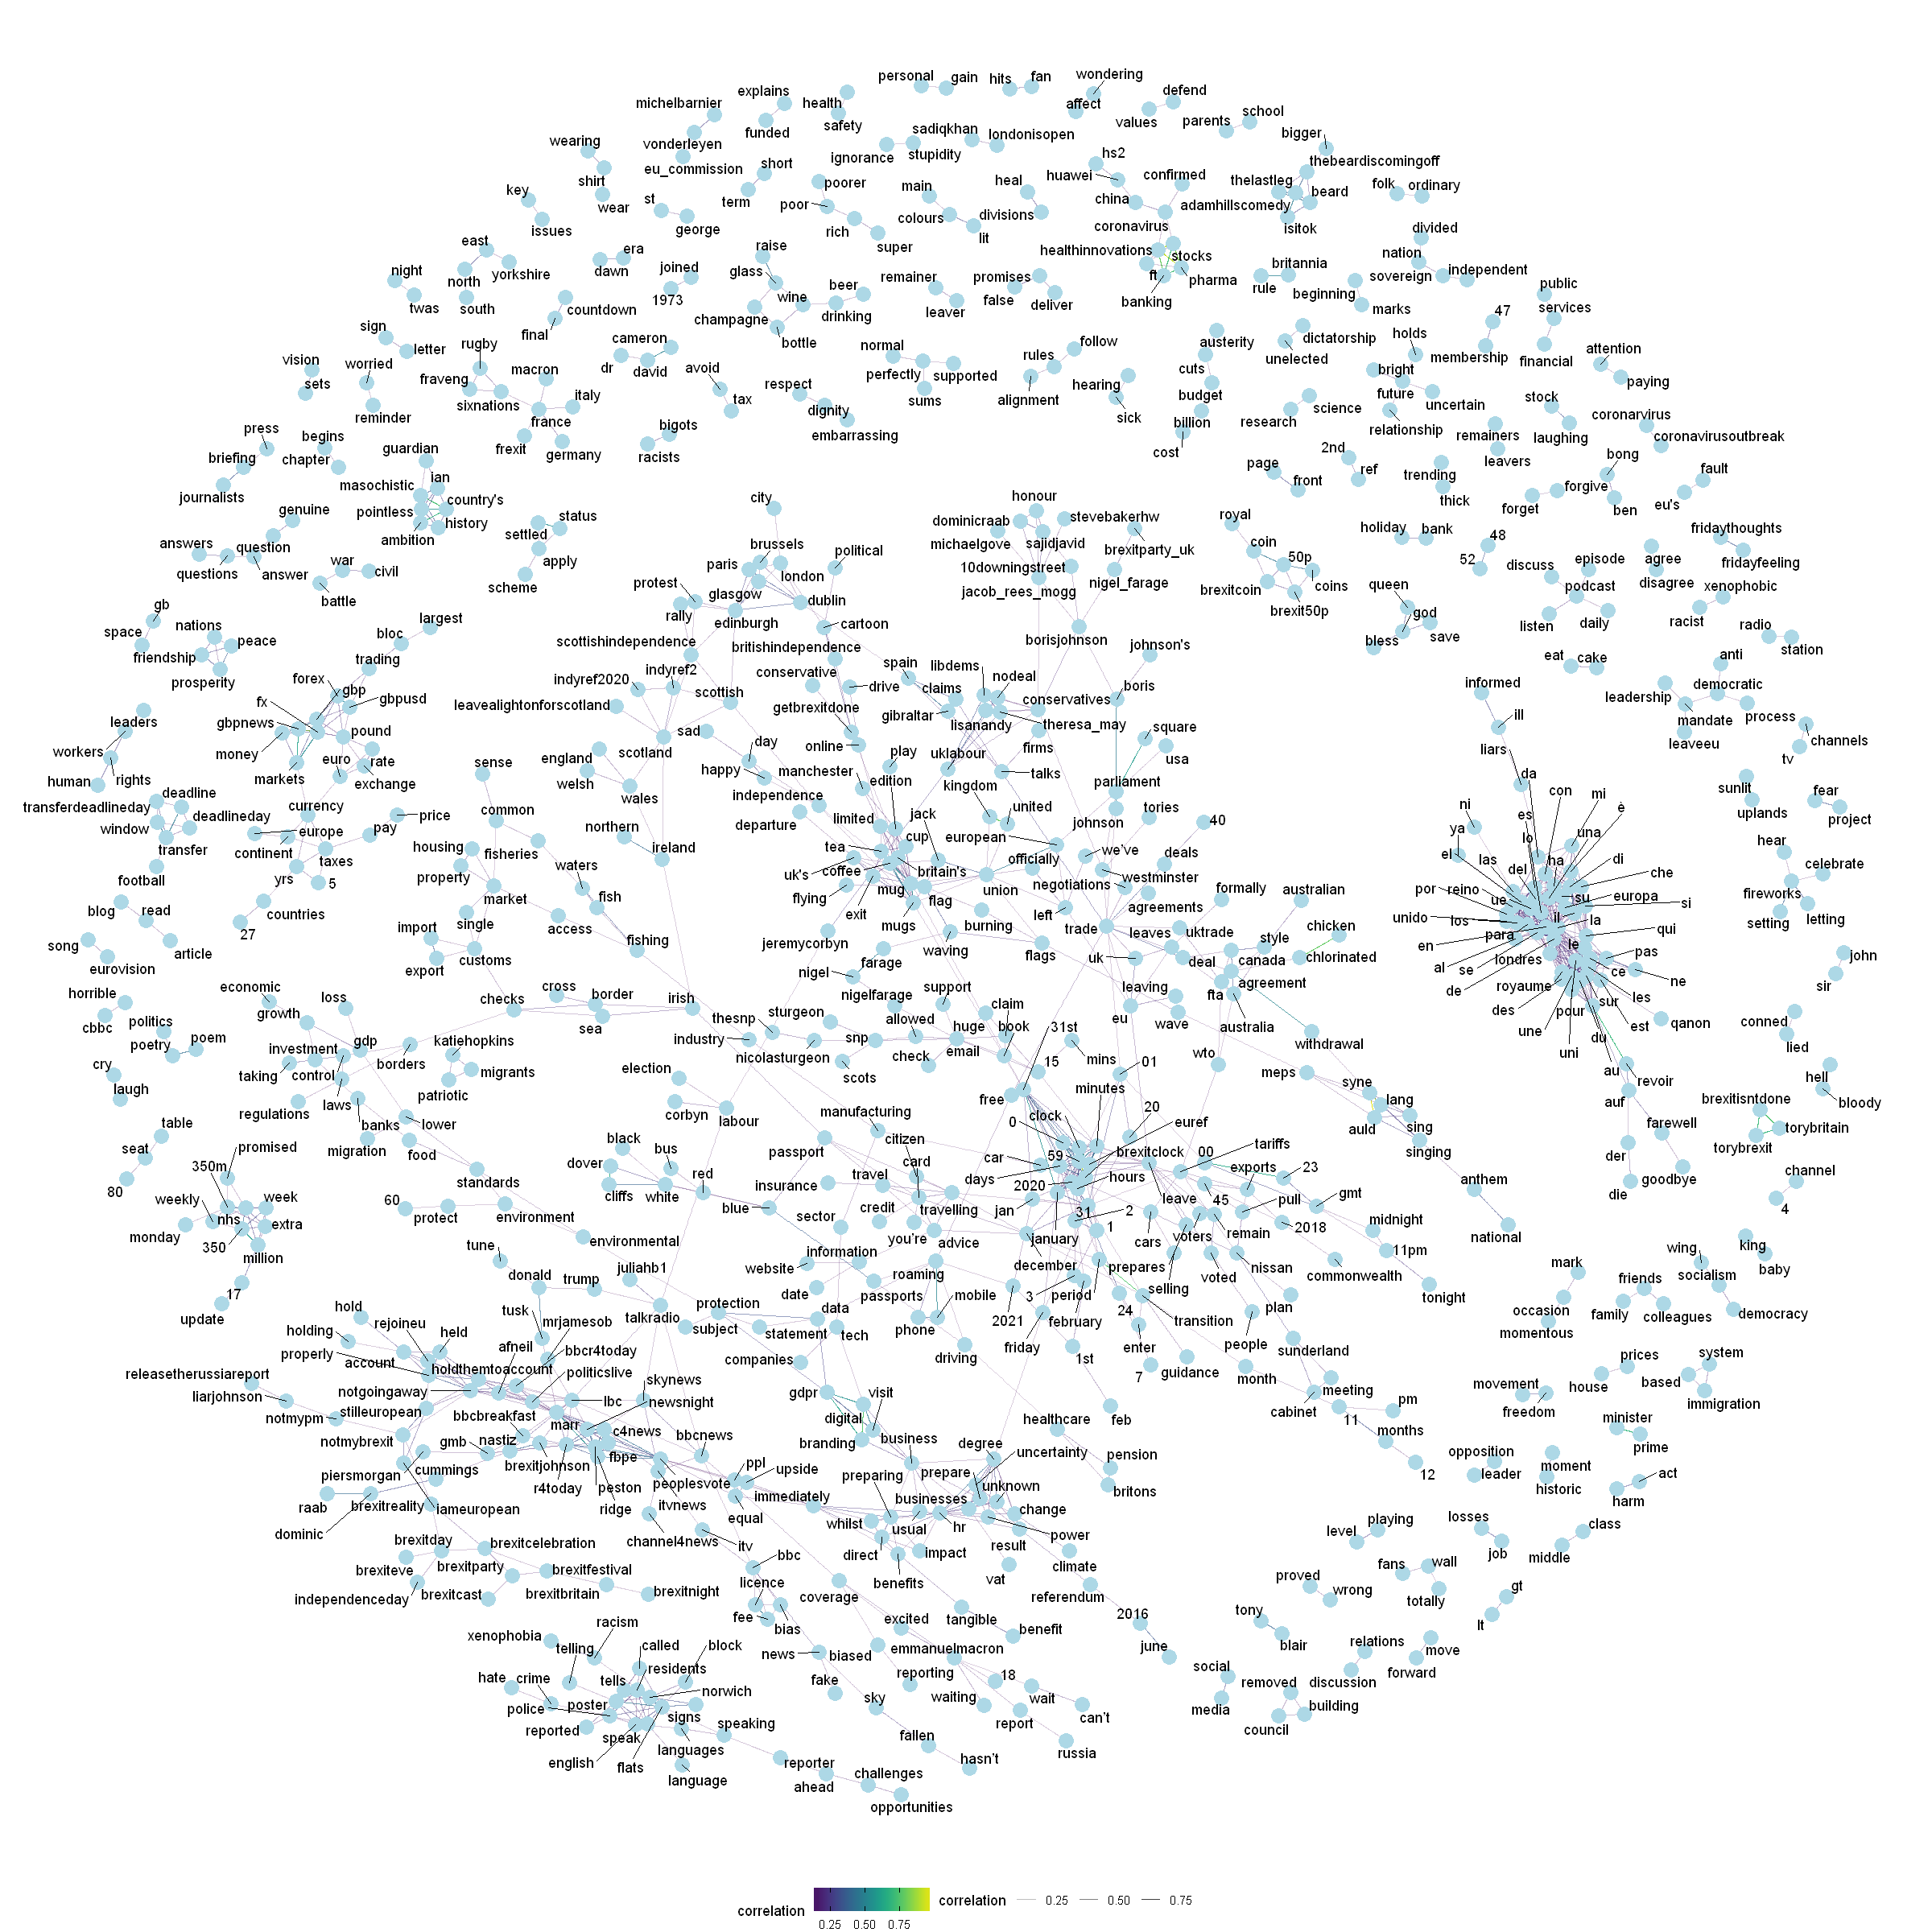

In [3]:
tdf<- group_by(tdf, word)
tdf<- filter(tdf, n() >= 40)
corr_terms<- pairwise_cor(tdf, word, tweet_num, sort = TRUE)

options(repr.plot.width = 20, repr.plot.height = 20)
corr_terms %>%
  filter(correlation >.1) %>%
  graph_from_data_frame() %>%
  ggraph(layout = "fr") +
  geom_edge_link(aes(edge_alpha = correlation, edge_colour = correlation), show.legend = TRUE) +
  geom_node_point(color = "lightblue", size = 5) +
  geom_node_text(aes(label = name), repel = TRUE) +
  theme_void()+
  scale_edge_colour_viridis()+
  theme(legend.position = "bottom")

In [ ]:
p